In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## بخش پیش پردازش

In [20]:
df = pd.read_csv('1.csv')

In [21]:
print(df.head()) 

       Suburb  Rooms Type      Price Method SellerG       Date  Distance  \
0  Abbotsford      2    h  1480000.0      S  Biggin  3/12/2016       2.5   
1  Abbotsford      2    h  1035000.0      S  Biggin  4/02/2016       2.5   
2  Abbotsford      3    h  1465000.0     SP  Biggin  4/03/2017       2.5   
3  Abbotsford      3    h   850000.0     PI  Biggin  4/03/2017       2.5   
4  Abbotsford      4    h  1600000.0     VB  Nelson  4/06/2016       2.5   

   Postcode  Bedroom2  Bathroom  Car  Landsize  BuildingArea  YearBuilt  \
0    3067.0       2.0       1.0  1.0     202.0           NaN        NaN   
1    3067.0       2.0       1.0  0.0     156.0          79.0     1900.0   
2    3067.0       3.0       2.0  0.0     134.0         150.0     1900.0   
3    3067.0       3.0       2.0  1.0      94.0           NaN        NaN   
4    3067.0       3.0       1.0  2.0     120.0         142.0     2014.0   

  CouncilArea  Lattitude  Longtitude             Regionname  Propertycount  
0       Yarra  

In [22]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['year'] = df['Date'].dt.year
day_one = df['Date'].min()
df['age'] = (df['Date'] - day_one).dt.days
df = df.drop('Date', axis=1)

In [23]:
df.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,year,age
0,Abbotsford,2,h,1480000.0,S,Biggin,2.5,3067.0,2.0,1.0,...,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,2016,310
1,Abbotsford,2,h,1035000.0,S,Biggin,2.5,3067.0,2.0,1.0,...,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,2016,7
2,Abbotsford,3,h,1465000.0,SP,Biggin,2.5,3067.0,3.0,2.0,...,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,2017,401
3,Abbotsford,3,h,850000.0,PI,Biggin,2.5,3067.0,3.0,2.0,...,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,2017,401
4,Abbotsford,4,h,1600000.0,VB,Nelson,2.5,3067.0,3.0,1.0,...,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,2016,128


In [24]:
df = df.drop('SellerG', axis=1)
df = df.drop('Suburb', axis=1)
df = df.drop('CouncilArea', axis=1)
df_tmp_part6=df
print(df.isnull().sum()) 

Rooms               0
Type                0
Price               0
Method              0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
year                0
age                 0
dtype: int64


In [25]:
#threshold_seller=50
# seller_counts = df['SellerG'].value_counts()
# rare_sellers = seller_counts[seller_counts < threshold_seller].index
# df['SellerG'] = df['SellerG'].replace(rare_sellers, 'Other-seller')
# df = pd.get_dummies(df, columns=['SellerG'], drop_first=True, dtype=int)

In [26]:
# threshold_suburb=20
# suburb_counts = df['Suburb'].value_counts()
# rare_suburb = suburb_counts[suburb_counts < threshold_suburb].index
# #suburb_counts.head(130)
# df['Suburb'] = df['Suburb'].replace(rare_sellers, 'Other-suburb')
# df = pd.get_dummies(df, columns=['Suburb'], drop_first=True, dtype=int)

In [27]:
# threshold_CouncilArea=10
# CouncilArea_counts = df['CouncilArea'].value_counts()
# rare_CouncilArea= CouncilArea_counts[CouncilArea_counts < threshold_CouncilArea].index
# CouncilArea_counts.head(130)
# df['CouncilArea'] = df['CouncilArea'].replace(rare_CouncilArea, 'Other-CouncilArea')
# df = pd.get_dummies(df, columns=['CouncilArea'], drop_first=True, dtype=int)

In [28]:
df_part3 = df.drop('Regionname', axis=1)
df_part3 = df_part3.drop('Method', axis=1)
df_part3 = df_part3.drop('Type', axis=1)
df_part3 = df_part3.fillna(df_part3.mean())

## one hot encoding (مربوط به بخش ششم)

In [29]:
df=pd.get_dummies(df, columns=['Regionname'],drop_first=True,dtype=int)
df=pd.get_dummies(df, columns=['Method'],drop_first=True,dtype=int)
df=pd.get_dummies(df, columns=['Type'],drop_first=True,dtype=int)
df.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,Method_S,Method_SA,Method_SP,Method_VB,Type_t,Type_u
0,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,...,0,0,0,0,1,0,0,0,0,0
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,...,0,0,0,0,1,0,0,0,0,0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,...,0,0,0,0,0,0,1,0,0,0
3,3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,...,0,0,0,0,0,0,0,1,0,0


In [30]:
df_tmp_part4=df
df = df.fillna(df.mean())

In [31]:
null_columns = df.columns[df.isnull().sum() > 0]

df[null_columns].isnull().sum()

Series([], dtype: float64)

## بخش سوم

In [32]:
def standardize(dataset):
    mean = np.mean(dataset, axis=0)
    std = np.std(dataset, axis=0)

    standardized_dataset = (dataset - mean) /std
    return standardized_dataset

def min_max_normalize(dataset):
    min_val = np.min(dataset, axis=0)
    max_val = np.max(dataset, axis=0)
    normalized_dataset = (dataset - min_val)/(max_val - min_val)
    return normalized_dataset



In [33]:
x = df_part3.drop('Price', axis=1) 
y = df['Price'].values

In [34]:
x.head()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,year,age
0,2,2.5,3067.0,2.0,1.0,1.0,202.0,151.96765,1964.684217,-37.7996,144.9984,4019.0,2016,310
1,2,2.5,3067.0,2.0,1.0,0.0,156.0,79.00000,1900.000000,-37.8079,144.9934,4019.0,2016,7
2,3,2.5,3067.0,3.0,2.0,0.0,134.0,150.00000,1900.000000,-37.8093,144.9944,4019.0,2017,401
3,3,2.5,3067.0,3.0,2.0,1.0,94.0,151.96765,1964.684217,-37.7969,144.9969,4019.0,2017,401
4,4,2.5,3067.0,3.0,1.0,2.0,120.0,142.00000,2014.000000,-37.8072,144.9941,4019.0,2016,128


## بخش دوم : در فایل  pdf  گزارش توضیحات کامل آمده است.

In [35]:
import numpy as np
import random
from sklearn.model_selection import train_test_split
# def loss2(x, y, w): 
#     log_predictions = np.log(np.dot(x, w) + 1e7)
#     log_y = np.log(y + 1e7)
#     log_mse = (1 / len(y)) * np.sum(np.square(log_predictions - log_y))
#     return log_mse

def loss_standard(x, y, w):
    #mult_res = np.dot(x, w) * (np.max(y) - np.min(y)) + np.min(y)
    cost = (1 / (2 * len(y))) * np.sum(np.square(np.dot(x, w) - y))
    return cost
    
def gradientdescent2(x, y, w,alpha, iters):
    lostarr = []
    for iter in range(iters):
        error = np.dot(x, w) - y
        delta_w = (1 / len(y)) * np.dot(x.T, error)
        w =w- alpha * delta_w
        alpha=alpha*0.999
        thislost = loss_standard(x, y, w)
        lostarr.append(thislost)

    return w,lostarr


In [43]:
def polynomial_regression(x, y, degree=2, alpha=0.0001, iters=20000, test_size=0.35, random_state=42, standard=False):
    
    y_reshaped = y.reshape(x.shape[0], 1)
    x_train, x_test, y_train, y_test = train_test_split(x, y_reshaped, test_size=test_size, random_state=random_state)
    x_train_poly = np.ones((x_train.shape[0], 1))
    
    for j in range(1, degree + 1):               
        x_tmp = np.power(x_train, j)
        x_train_poly = np.append(x_train_poly, x_tmp, axis=1)
        
    if standard:
        x_train_poly[:, 1:] = standardize(x_train_poly[:, 1:])   
    else:
        x_train_poly[:, 1:] = min_max_normalize(x_train_poly[:, 1:])
    y_train = standardize(y_train)

    w = np.zeros((x_train_poly.shape[1], 1))
    
    w, lostarr2 = gradientdescent2(x_train_poly, y_train, w, alpha, iters)

    x_test_poly = np.ones((x_test.shape[0], 1))  

    
    for j in range(1, degree + 1):               
        x_tmp = np.power(x_test, j)
        x_test_poly = np.append(x_test_poly, x_tmp, axis=1)

    y_test = standardize(y_test)
    if standard:
        x_test_poly[:, 1:] = standardize(x_test_poly[:, 1:])
        error = loss_standard(x_test_poly, y_test, w)
    else:
        x_test_poly[:, 1:] = min_max_normalize(x_test_poly[:, 1:])
        error = loss_standard(x_test_poly, y_test, w)
    print("test error:", error) 
    plt.plot(lostarr2)
    plt.show()

## مقایسه برای بخش 3 - normalize و  standerized

test error: 0.19062905549970088


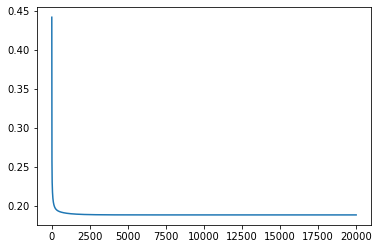

test error: 0.2781570271128026


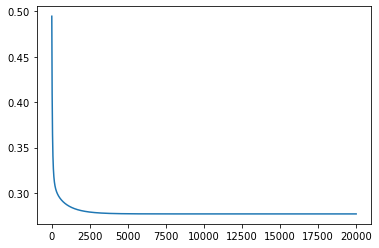

In [58]:
polynomial_regression(x,y, degree=8, alpha=1e-2, standard=True)
polynomial_regression(x,y, degree=8, alpha=1e-2)

## بخش چهارم

In [48]:
df_mean = df_tmp_part4.fillna(df_tmp_part4.mean()) 
df_median = df_tmp_part4.fillna(df_tmp_part4.median())
df_0= df_tmp_part4.fillna(0)

In [49]:
print(df_0.isnull().sum()) 

Rooms                                    0
Price                                    0
Distance                                 0
Postcode                                 0
Bedroom2                                 0
Bathroom                                 0
Car                                      0
Landsize                                 0
BuildingArea                             0
YearBuilt                                0
Lattitude                                0
Longtitude                               0
Propertycount                            0
year                                     0
age                                      0
Regionname_Eastern Victoria              0
Regionname_Northern Metropolitan         0
Regionname_Northern Victoria             0
Regionname_South-Eastern Metropolitan    0
Regionname_Southern Metropolitan         0
Regionname_Western Metropolitan          0
Regionname_Western Victoria              0
Method_S                                 0
Method_SA  

In [50]:
print(df_median.isnull().sum()) 

Rooms                                    0
Price                                    0
Distance                                 0
Postcode                                 0
Bedroom2                                 0
Bathroom                                 0
Car                                      0
Landsize                                 0
BuildingArea                             0
YearBuilt                                0
Lattitude                                0
Longtitude                               0
Propertycount                            0
year                                     0
age                                      0
Regionname_Eastern Victoria              0
Regionname_Northern Metropolitan         0
Regionname_Northern Victoria             0
Regionname_South-Eastern Metropolitan    0
Regionname_Southern Metropolitan         0
Regionname_Western Metropolitan          0
Regionname_Western Victoria              0
Method_S                                 0
Method_SA  

In [51]:
print(df_mean.isnull().sum()) 

Rooms                                    0
Price                                    0
Distance                                 0
Postcode                                 0
Bedroom2                                 0
Bathroom                                 0
Car                                      0
Landsize                                 0
BuildingArea                             0
YearBuilt                                0
Lattitude                                0
Longtitude                               0
Propertycount                            0
year                                     0
age                                      0
Regionname_Eastern Victoria              0
Regionname_Northern Metropolitan         0
Regionname_Northern Victoria             0
Regionname_South-Eastern Metropolitan    0
Regionname_Southern Metropolitan         0
Regionname_Western Metropolitan          0
Regionname_Western Victoria              0
Method_S                                 0
Method_SA  

test error: 0.1955086954290067


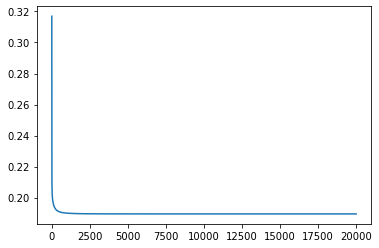

In [52]:
normalized_df_median = min_max_normalize(df_median)
x = normalized_df_median.drop('Price', axis=1) 
y = df_median['Price'].values
polynomial_regression(x,y,2,0.1, standard=True)

test error: 0.2055853136829053


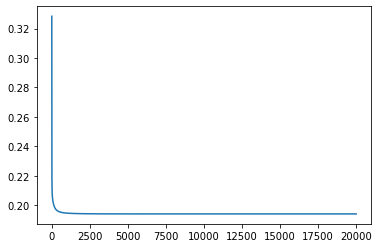

In [53]:
normalized_df_0 = min_max_normalize(df_0)
x = normalized_df_0.drop('Price', axis=1) 
y = df_0['Price'].values
polynomial_regression(x,y,2,0.1, standard=True)

test error: 0.19661834407502246


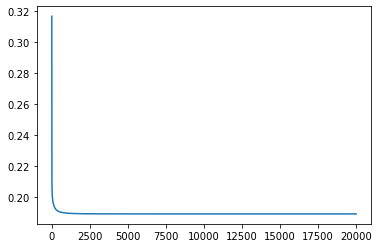

In [54]:
normalized_df_mean = min_max_normalize(df_mean)
x = normalized_df_mean.drop('Price', axis=1) 
y = df_mean['Price'].values
polynomial_regression(x,y,2,0.1, standard=True)

## بخش 5ام - مقایسه مقادیر مختلف برای underfitting و overfitting

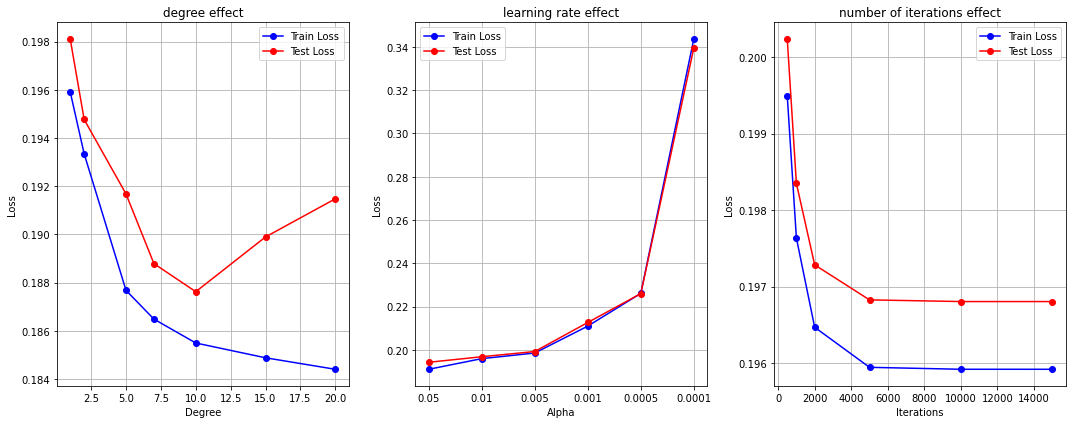

In [56]:
x = df_median.drop('Price', axis=1) 
y = df_median['Price'].values

def polynomial_regression_part5(x, y, degree=2, alpha=0.0001, iters=1000, test_size=0.35, random_state=42, standard=True):
    y_reshaped = y.reshape(x.shape[0], 1)
    x_train, x_test, y_train, y_test = train_test_split(x, y_reshaped, test_size=test_size, random_state=random_state)
    x_train_poly = np.ones((x_train.shape[0], 1))
#     print(x_train)
#     print(x_train_poly)
    for j in range(1, degree + 1):               
        x_tmp = np.power(x_train, j)
        x_train_poly = np.append(x_train_poly, x_tmp, axis=1)

    if standard:
        x_train_poly[:, 1:] = standardize(x_train_poly[:, 1:])     
    else:
        x_train_poly[:, 1:] = min_max_normalize(x_train_poly[:, 1:])
        
    y_train = standardize(y_train)
    w = np.zeros((x_train_poly.shape[1], 1))
    

    if standard:
        w, lostarr_train = gradientdescent2(x_train_poly, y_train, w, alpha, iters)
        # w, lostarr_train = adam(x_train_poly, y_train, w, alpha, iters)
        # print(lostarr_train)
    else:
        w, lostarr_train = gradientdescent2(x_train_poly, y_train, w, alpha, iters)
        # w, lostarr_train = adam(x_train_poly, y_train, w, alpha, iters)
        

    x_test_poly = np.ones((x_test.shape[0], 1))  
#     print(lostarr2)
    
    for j in range(1, degree + 1):               
        x_tmp = np.power(x_test, j)
        x_test_poly = np.append(x_test_poly, x_tmp, axis=1)

    y_test = standardize(y_test)
    if standard:
        x_test_poly[:, 1:] = standardize(x_test_poly[:, 1:])    
    else:
        x_test_poly[:, 1:] = min_max_normalize(x_test_poly[:, 1:])
       
    test_loss = loss_standard(x_test_poly, y_test, w)
    train_loss = lostarr_train[-1]
    
    return train_loss, test_loss, lostarr_train


degrees = [1, 2, 5, 7, 10, 15, 20]
alphas = [0.05, 0.01, 0.005, 0.001, 0.0005, 1e-4]
iterations = [500, 1000, 2000, 5000, 10000, 15000]

train_loss_degree = []
test_loss_degree = []

train_loss_alpha = []
test_loss_alpha = []

train_loss_iterations = []
test_loss_iterations = []

for degree in degrees:
    train_loss, test_loss, _ = polynomial_regression_part5(x, y, degree=degree, alpha=0.02, iters=10000)
    if np.isnan(train_loss): 
        train_loss_degree.append(1.5)
    else:
        train_loss_degree.append(train_loss)
    if np.isnan(test_loss): 
        test_loss_degree.append(1.5)
    else:
        test_loss_degree.append(test_loss)

for alpha in alphas:
    train_loss, test_loss, _ = polynomial_regression_part5(x, y, degree=2, alpha=alpha, iters=5000)
    if np.isnan(train_loss): 
        train_loss_alpha.append(1.5)
    else:
        train_loss_alpha.append(train_loss)
    if np.isnan(test_loss): 
        test_loss_alpha.append(1.5)
    else:
        test_loss_alpha.append(test_loss)

for iters in iterations:
    train_loss, test_loss, _ = polynomial_regression_part5(x, y, degree=2, alpha=0.01, iters=iters)
    if np.isnan(train_loss): 
        train_loss_iterations.append(1.5)
    else:
        train_loss_iterations.append(train_loss)
    if np.isnan(test_loss): 
        test_loss_iterations.append(1.5)
    else:
        test_loss_iterations.append(test_loss)

plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.plot(degrees, train_loss_degree, 'bo-', label='Train Loss')
plt.plot(degrees, test_loss_degree, 'ro-', label='Test Loss')
plt.title('degree effect')
plt.xlabel('Degree')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 3, 2)
plt.plot([str(alpha) for alpha in alphas], train_loss_alpha, 'bo-', label='Train Loss')
plt.plot([str(alpha) for alpha in alphas], test_loss_alpha, 'ro-', label='Test Loss')
plt.title('learning rate effect')
plt.xlabel('Alpha')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(iterations, train_loss_iterations, 'bo-', label='Train Loss')
plt.plot(iterations, test_loss_iterations, 'ro-', label='Test Loss')
plt.title('number of iterations effect')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

## بخش ششم - روش one hot و label

test error: 0.19715350389851868


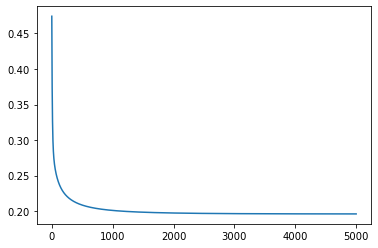

In [59]:
df_tmp_part6['Regionname'] = pd.factorize(df_tmp_part6['Regionname'])[0]
df_tmp_part6['Method'] = pd.factorize(df_tmp_part6['Method'])[0]
df_tmp_part6['Type'] = pd.factorize(df_tmp_part6['Type'])[0]
df_median = df_tmp_part6.fillna(df_tmp_part6.median())
normalized_df_median = min_max_normalize(df_median)
x = normalized_df_median.drop('Price', axis=1) 
y = df['Price'].values
polynomial_regression(x,y,4,0.01,5000, standard=True)


test error: 0.19304847587893179


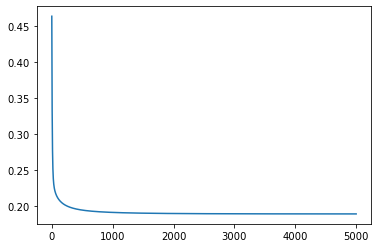

In [60]:
df_tmp_part6=pd.get_dummies(df_tmp_part6, columns=['Regionname'],drop_first=True,dtype=int)
df_tmp_part6=pd.get_dummies(df_tmp_part6, columns=['Method'],drop_first=True,dtype=int)
df_tmp_part6=pd.get_dummies(df_tmp_part6, columns=['Type'],drop_first=True,dtype=int)
df_median = df_tmp_part6.fillna(df_tmp_part6.median())
normalized_df_median = min_max_normalize(df_median)
x = normalized_df_median.drop('Price', axis=1) 
y = df['Price'].values
polynomial_regression(x,y,4,0.01,5000, standard=True)

## بخش هفتم - folding

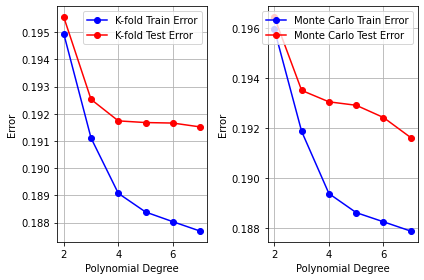

In [62]:
import numpy as np
import random
from sklearn.model_selection import KFold, train_test_split
import matplotlib.pyplot as plt

def polynomial_regression_kfold(x, y, degree=2, alpha=0.0001, iters=1800, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)  
    train_errors = []
    test_errors = []
    x = np.array(x)
    y = np.array(y)
    for train_index, test_index in kf.split(x):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]

        y_train = y_train.reshape(-1, 1)
        y_test = y_test.reshape(-1, 1)
        
        x_train_poly = np.ones((x_train.shape[0], 1))
        for j in range(1, degree + 1):
            x_tmp=np.power(x_train, j)
            x_train_poly = np.append(x_train_poly,x_tmp, axis=1)
        
        w = np.zeros((x_train_poly.shape[1], 1))
        x_train_poly[:, 1:] = standardize(x_train_poly[:, 1:])
        y_train = standardize(y_train)
        w, trainlossarr = gradientdescent2(x_train_poly, y_train, w, alpha, iters)
        
        x_test_poly = np.ones((x_test.shape[0], 1))
        for j in range(1, degree + 1):
            x_tmp= np.power(x_test, j)
            x_test_poly = np.append(x_test_poly,x_tmp, axis=1)

        x_test_poly[:, 1:] = standardize(x_test_poly[:, 1:])
        y_test = standardize(y_test)
        error = loss_standard(x_test_poly, y_test, w)
        
        train_errors.append(trainlossarr[-1]) 
        test_errors.append(error)
    
    return np.mean(train_errors), np.mean(test_errors)

def polynomial_regression_montecarlo(x, y, degree=2, alpha=0.0001, iters=1800, test_size=0.35, n=10):
    train_errors = []
    test_errors = []
    
    for _ in range(n):
        x_train,x_test, y_train,y_test = train_test_split(x, y, test_size=test_size, random_state=42)
        y_train = y_train.reshape(-1, 1)
        y_test = y_test.reshape(-1, 1)
 
        x_train_poly = np.ones((x_train.shape[0], 1))
        for j in range(1, degree + 1):
            x_tmp=np.power(x_train, j)
            x_train_poly = np.append(x_train_poly,x_tmp, axis=1)
      
        w = np.zeros((x_train_poly.shape[1], 1))
        x_train_poly[:, 1:] = standardize(x_train_poly[:, 1:])
        y_train = standardize(y_train)
        w, trainlossarr = gradientdescent2(x_train_poly, y_train, w, alpha, iters)
        
        x_test_poly = np.ones((x_test.shape[0], 1))
        
        for j in range(1, degree + 1):
            x_tmp= np.power(x_test, j)
            x_test_poly = np.append(x_test_poly,x_tmp, axis=1)

        x_test_poly[:, 1:] = standardize(x_test_poly[:, 1:])
        y_test = standardize(y_test)
        error = loss_standard(x_test_poly, y_test, w)  
        train_errors.append(trainlossarr[-1]) 
        test_errors.append(error)
    
    return np.mean(train_errors), np.mean(test_errors)


degrees = [2, 3, 4, 5, 6, 7]  
alpha = 0.01
iters = 5000
k = 5 
n = 10  
all_train_kfold = []
all_test_kfold = []
all_train_montecarlo = []
all_test_montecarlo = []

for degree in degrees:
    train_error_k, test_error_k = polynomial_regression_kfold(x, y, degree=degree, alpha=alpha, iters=iters, k=k)
    all_train_kfold.append(train_error_k)
    all_test_kfold.append(test_error_k)

    train_error_m, test_error_m = polynomial_regression_montecarlo(x, y, degree=degree, alpha=alpha, iters=iters, n=n)
    all_train_montecarlo.append(train_error_m)
    all_test_montecarlo.append(test_error_m)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(degrees,  all_train_kfold, 'bo-', label='K-fold Train Error')
ax1.plot(degrees, all_test_kfold, 'ro-', label='K-fold Test Error',)
ax1.set_xlabel("Polynomial Degree")
ax1.set_ylabel("Error")
ax1.legend()
ax1.grid(True)

ax2.plot(degrees, all_train_montecarlo ,'bo-', label='Monte Carlo Train Error',)
ax2.plot(degrees, all_test_montecarlo, 'ro-', label='Monte Carlo Test Error',)
ax2.set_xlabel("Polynomial Degree")
ax2.set_ylabel("Error")
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()
